<a href="https://colab.research.google.com/github/localhersheys/k-means-clustering-from-scratch/blob/main/k_means_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d uciml/iris

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 5.76MB/s]


In [3]:
!unzip iris.zip

Archive:  iris.zip
replace Iris.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

# fetch dataset
iris = pd.read_csv('/content/Iris.csv')

In [5]:
X_data = np.array(iris)
X_data = X_data.T
Y_data = X_data[5]
X_data = X_data[0:5]
X_data.shape

(5, 150)

In [6]:
Y_data[Y_data == 'Iris-setosa'] = 0
Y_data[Y_data == 'Iris-versicolor'] = 1
Y_data[Y_data == 'Iris-virginica'] = 2
Y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

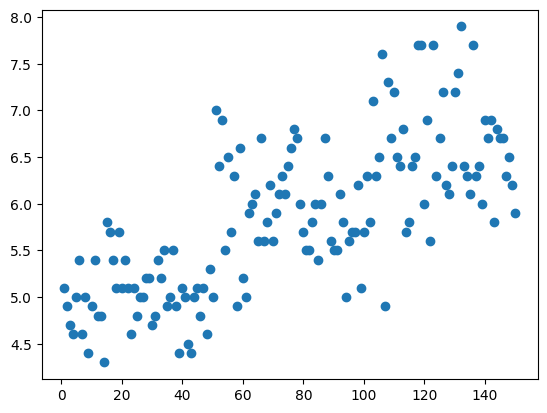

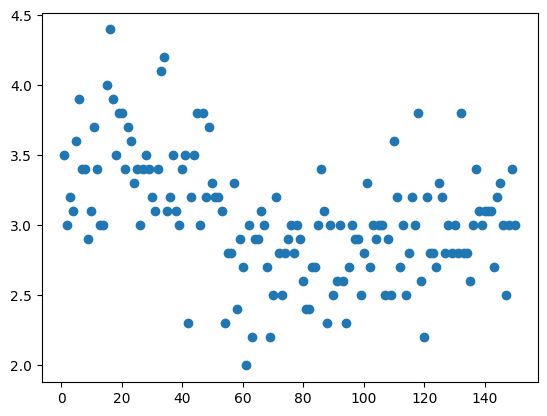

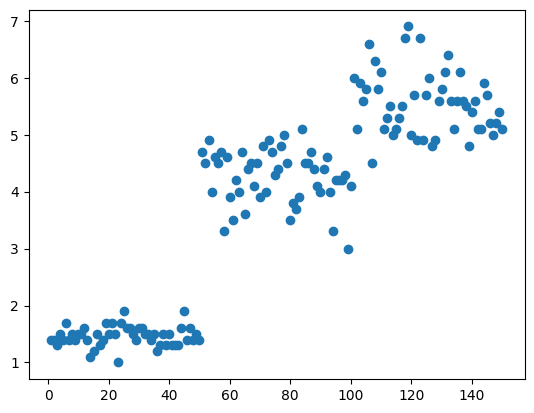

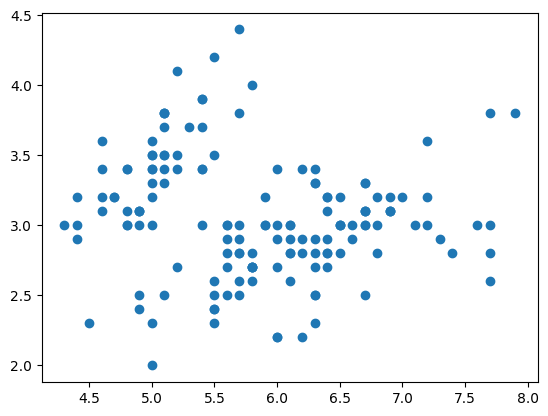

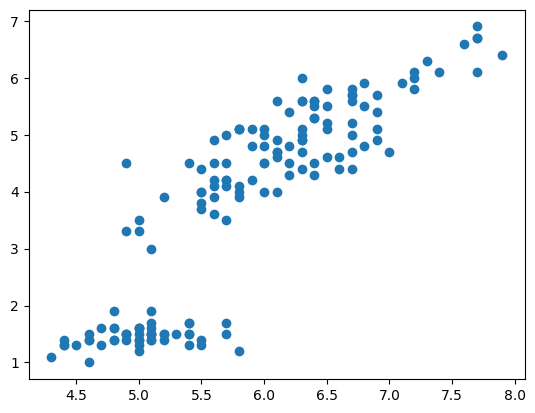

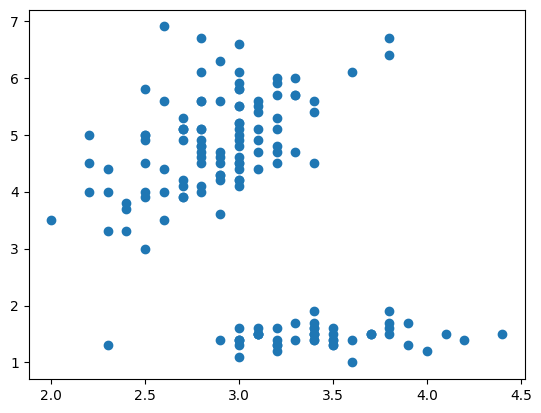

In [7]:
plt.scatter(X_data[0],X_data[1])
plt.show()
plt.scatter(X_data[0],X_data[2])
plt.show()
plt.scatter(X_data[0],X_data[3])
plt.show()
plt.scatter(X_data[1],X_data[2])
plt.show()
plt.scatter(X_data[1],X_data[3])
plt.show()
plt.scatter(X_data[2],X_data[3])
plt.show()

In [8]:
# #finding euclidean distance
# def find_dist(x, y, m):
#     return np.sqrt(np.square(x - x[m]) + np.square(y - y[m]))

# def find_mean(x):
#     if x.size!=0:
#         return sum(x)/x.size
#     else:
#         return 0

# def calc_dist(x,y,mean):
#     return np.sqrt(np.square(x-mean[0]) + np.square(y-mean[1]))

In [9]:
# #forms k clusters
# def form_cluster(k, x, y):
#     #get k random indexes for the k clusters and store in indexes
#     indexes = np.random.choice(x.size,k, replace = False)
#     #calculate the distance of all the points from these three points
#     dist = np.random.choice(5,(k,x.size))
#     for i in range(k):
#         dist[i] = find_dist(x.astype(float), y.astype(float), indexes[i])
#     #form the classes on the basis of distance from each cluster head
#     classified = np.argmax(dist, axis=0)
#     #find mean of each class
#     mean = np.random.choice(1,(i+1,2))
#     for i in range(k):
#         mean[i][0] = find_mean(x[classified==i].astype(float))
#         mean[i][1] = find_mean(y[classified==i].astype(float))
#     #calculate distance from mean
#     for i in range(k):
#         dist[i] = calc_dist(x.astype(float),y.astype(float),mean[i])
#     #classify according to the distance from means
#     classified = np.argmax(dist, axis=0)
#     #calculate variance
#     var = 0
#     for i in range(k):
#         if (sum(classified == i)>0): var+= sum(np.square(dist[i][classified==i].astype(float)))/sum(classified==i)
#     return classified, var

# #defining a function for classifier
# def classifier(k, x, y, iterations, Y):
#     #setting up dummy variables for storing the final answer
#     final_classification = np.random.choice(1,x.size)
#     final_var = math.inf
#     #for 'iteration' no. of possibilities of cluster divisions
#     for i in range(iterations+1):
#         classified, var = form_cluster(k, x, y)
#         #changing the final answer if we get lesser variation
#         if var < final_var :
#             final_var = var
#             final_classification = classified
#         if i%10==0:
#             print('iteration number : ', i)
#             print('variance : ',final_var)
#             for j in range(k):
#                 plt.scatter(x[final_classification==j],y[final_classification==j])
#             plt.show()
#     return final_classification, final_var

In [10]:
# classifier(3, X_data[0], X_data[4], 1000, Y_data)

In [11]:
def find_dist(dataset, centroid):
  sum = 0
  datasett = dataset.T
  datasett = datasett - centroid
  return np.sum(np.square(datasett), axis=1)


In [12]:
def update_centroids(classified, dataset, centroids):
  not_marked = []
  for i in range(centroids.shape[0]):
    if sum(classified == i) > 0:
      for j in range(dataset.shape[0]):
        centroids[i][j] = np.sum(dataset[j][classified == i])/sum(classified==i)
    else:
      not_marked.append(i)
  for i in not_marked:
    centroids[not_marked] = np.sum(centroids, axis=0)/centroids.shape[0]
  return centroids

In [13]:
def k_clustering(dataset, k, iterations):
  #find initial centroids
  centroids = [[] for _ in range(k)]
  for i in  range(k):
    for j in range(dataset.shape[0]):
      centroids[i].append(np.random.randint(np.min(dataset[i]),np.max(dataset[i])))
  centroids = np.array(centroids)
  centroid_history = [centroids.copy()]
  #find distance of all the points from centroids
  dist = []
  for i in range(k):
    dist.append(find_dist(dataset, centroids[i]))
  dist = np.array(dist)
  #classify
  classified  = np.argmax(dist, axis=0)
  for i in range(iterations+1):
    centroids = update_centroids(classified, dataset, centroids)
    centroid_history.append(centroids.copy())
    dist = []
    for i in range(k):
      dist.append(find_dist(dataset, centroids[i]))
  return classified, centroid_history


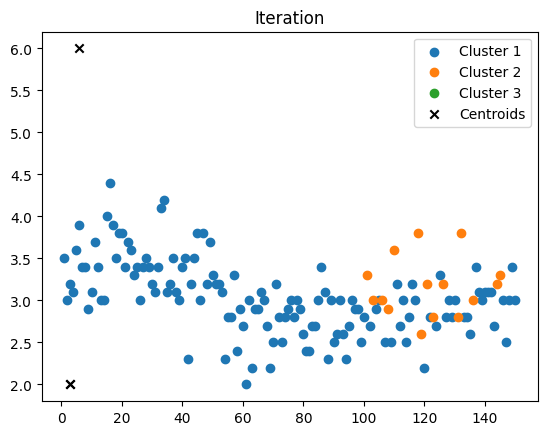

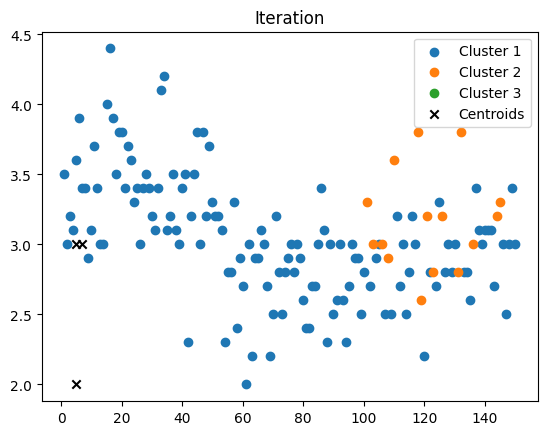

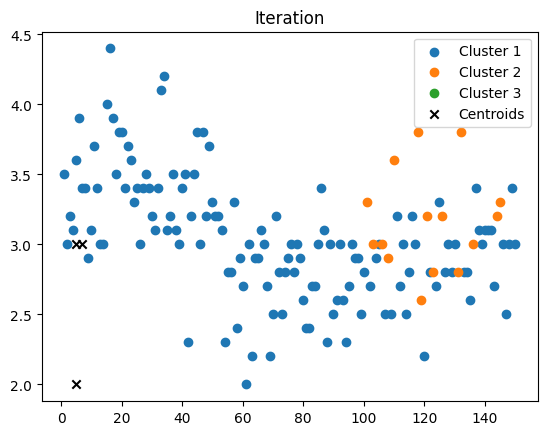

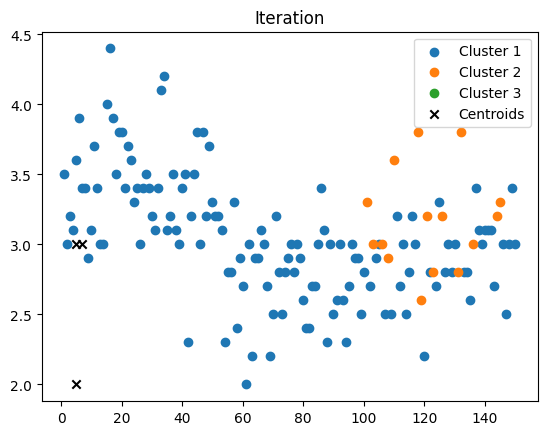

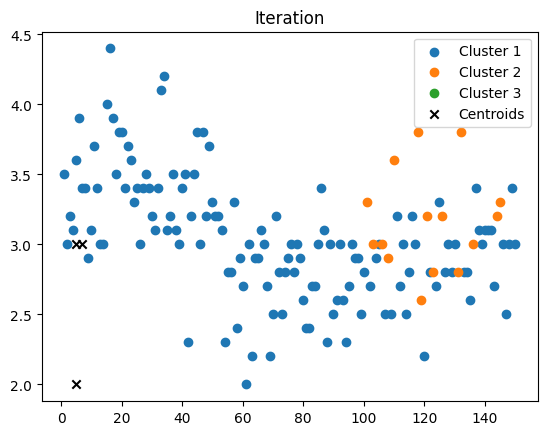

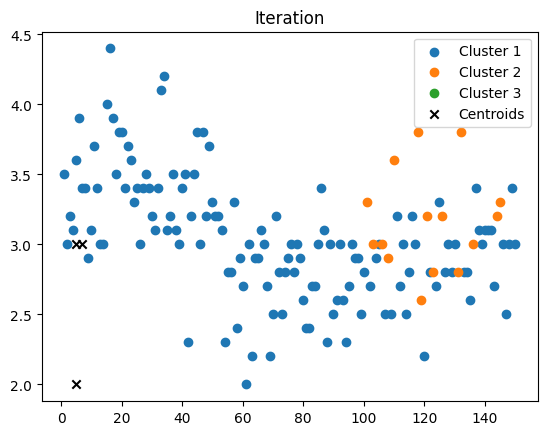

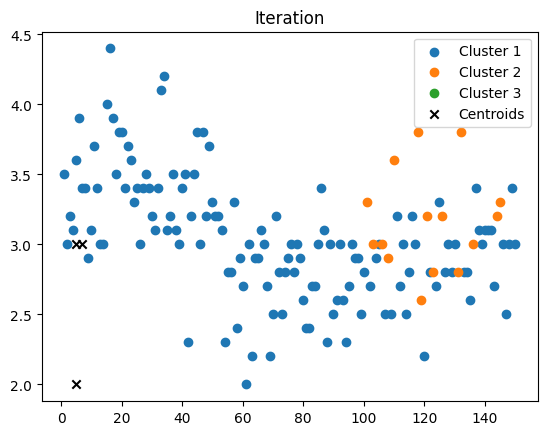

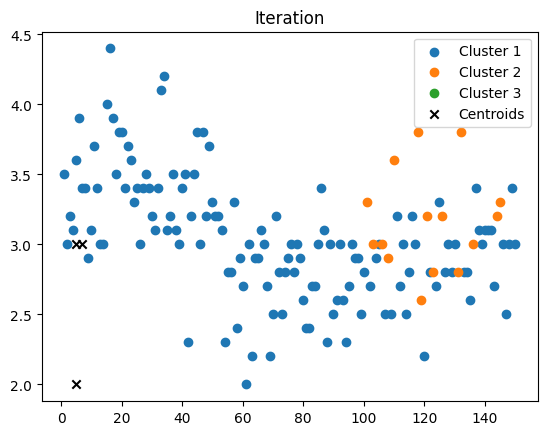

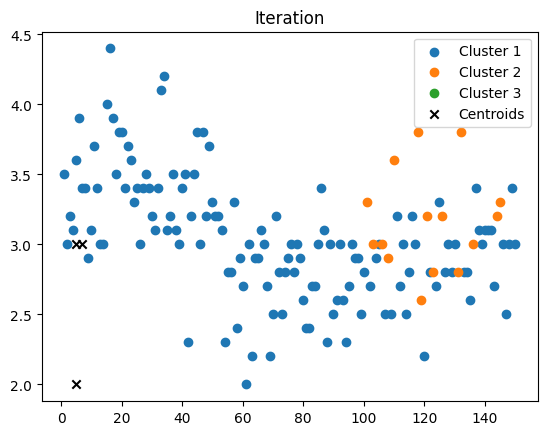

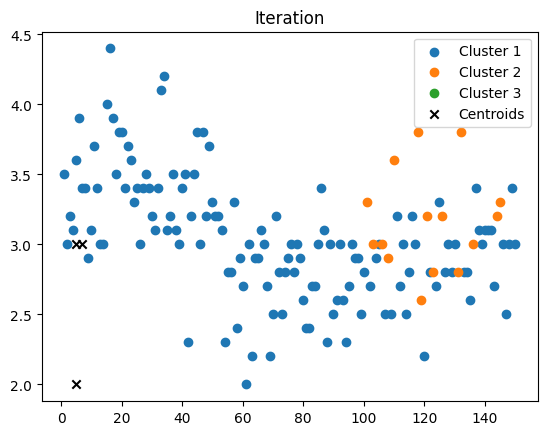

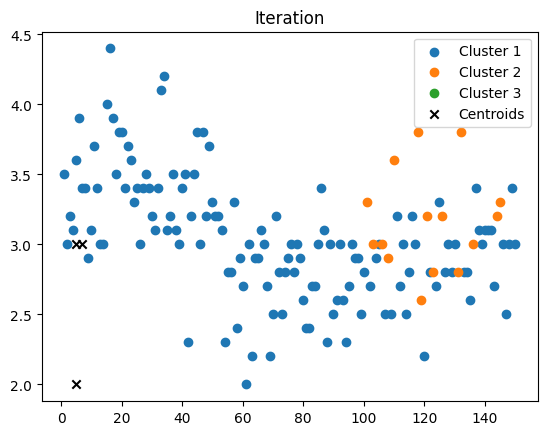

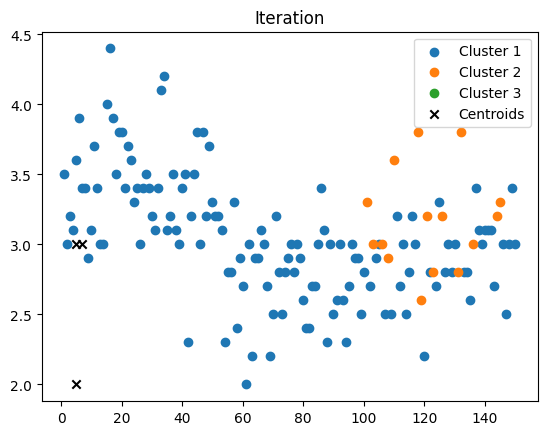

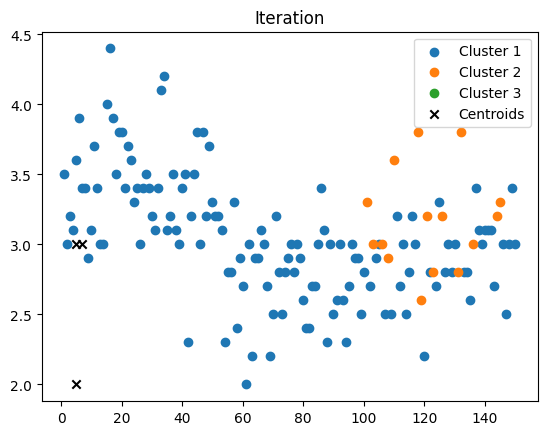

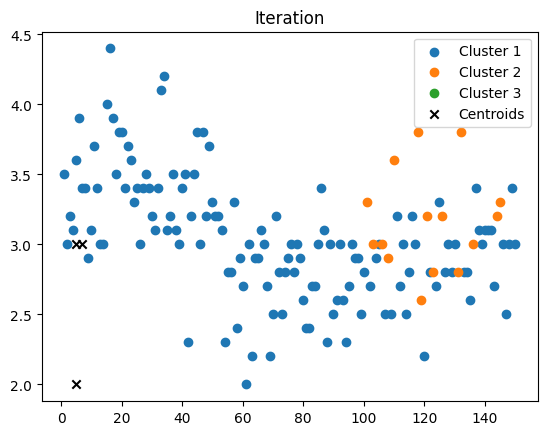

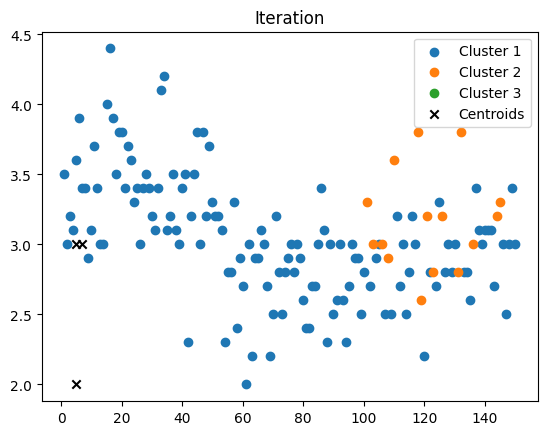

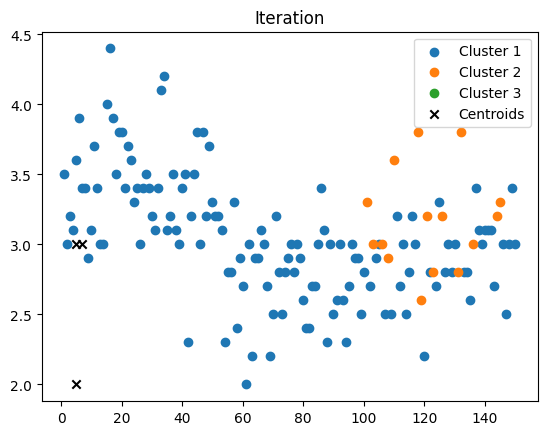

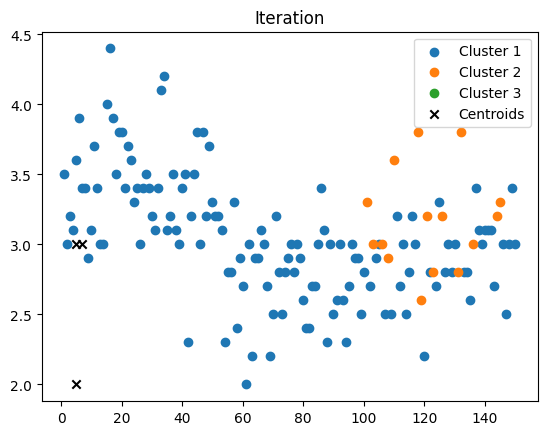

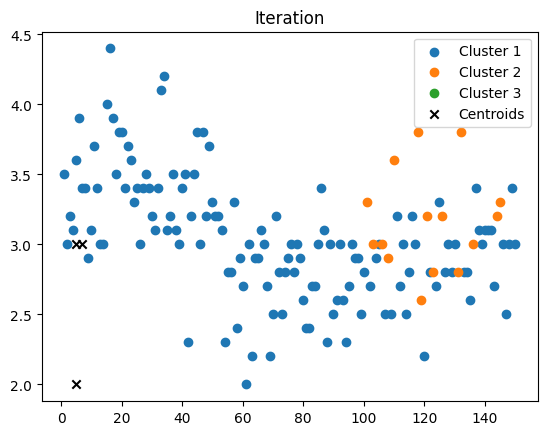

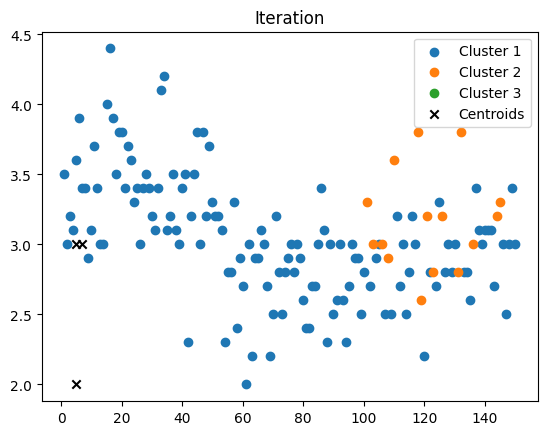

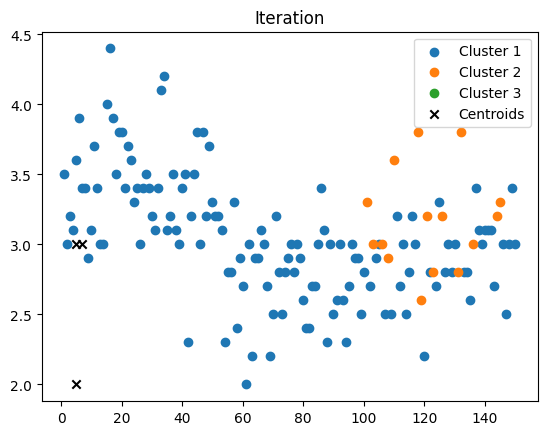

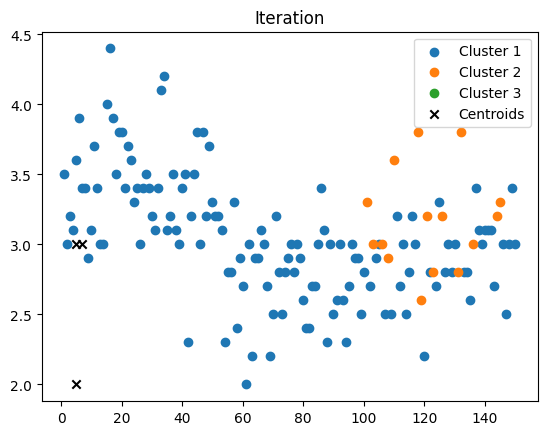

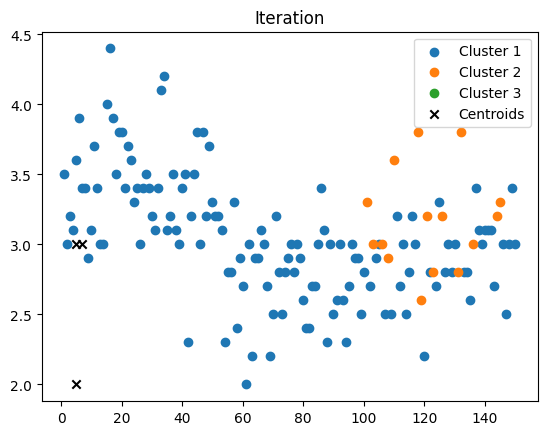

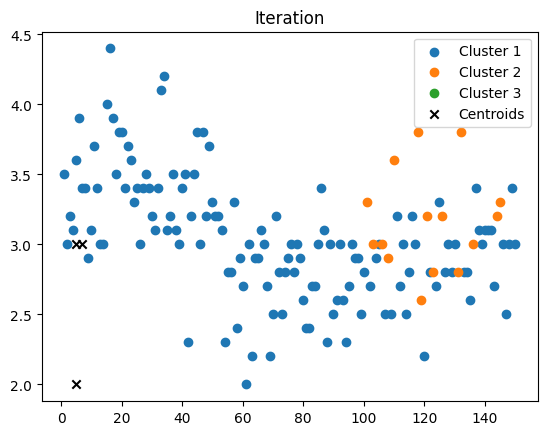

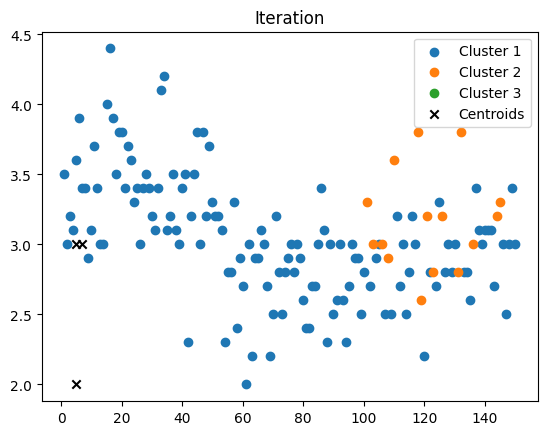

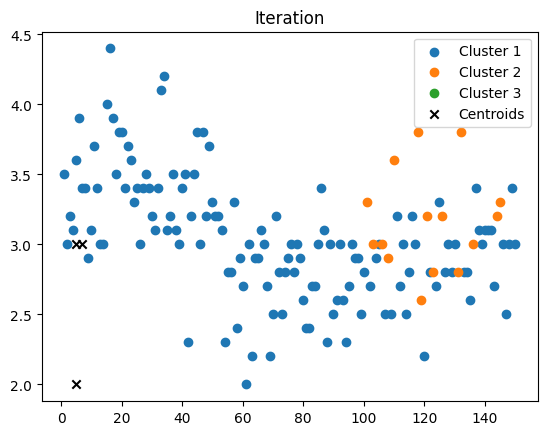

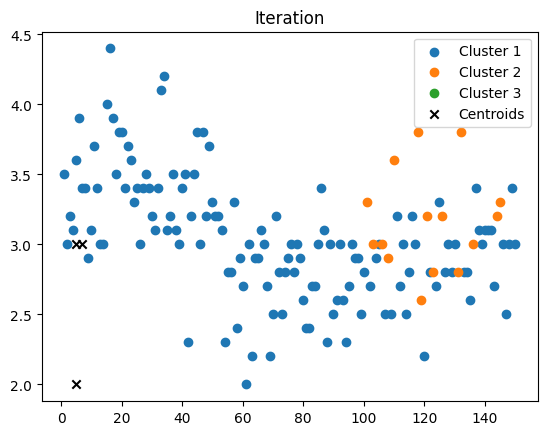

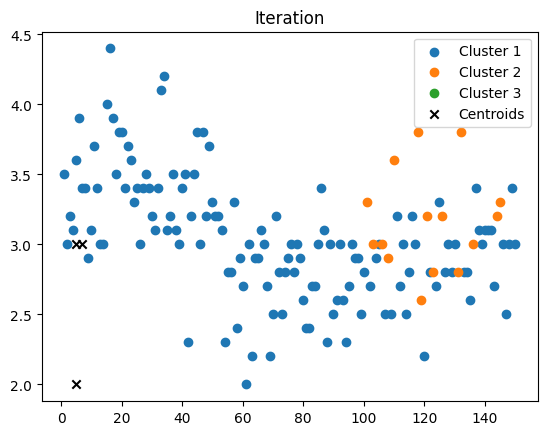

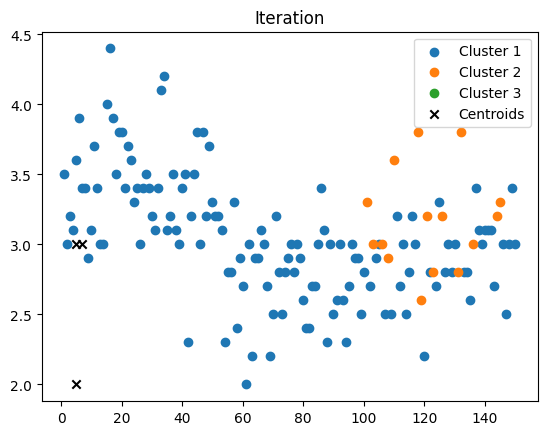

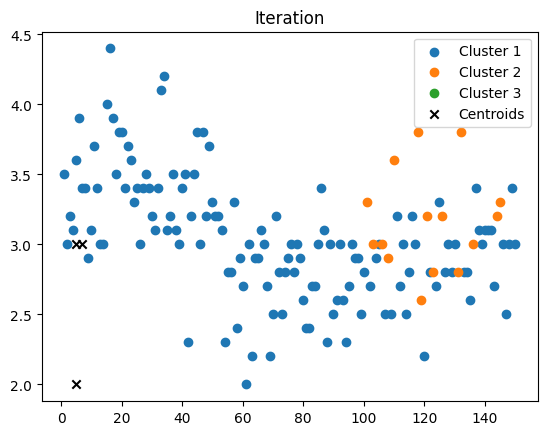

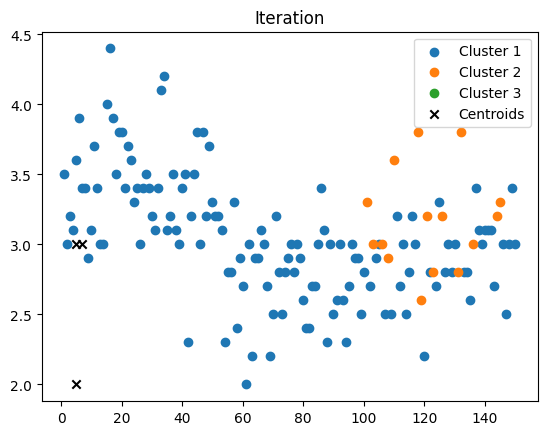

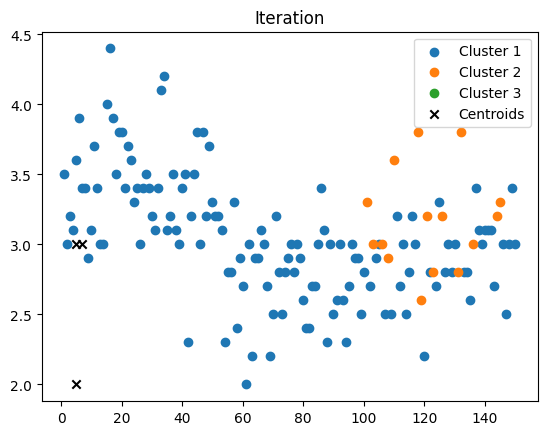

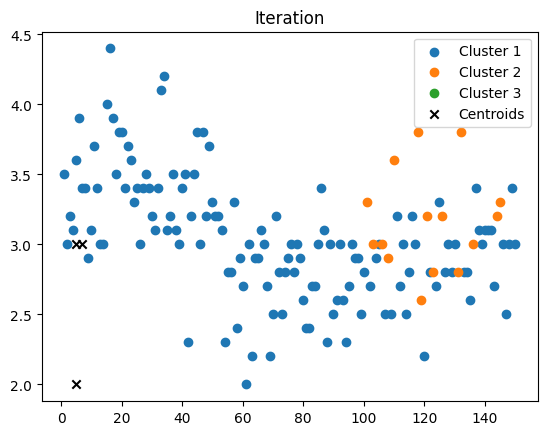

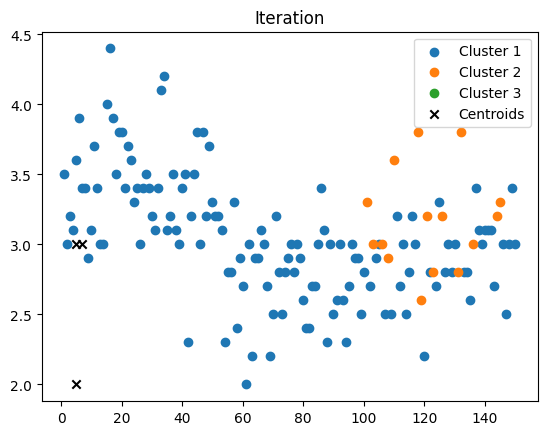

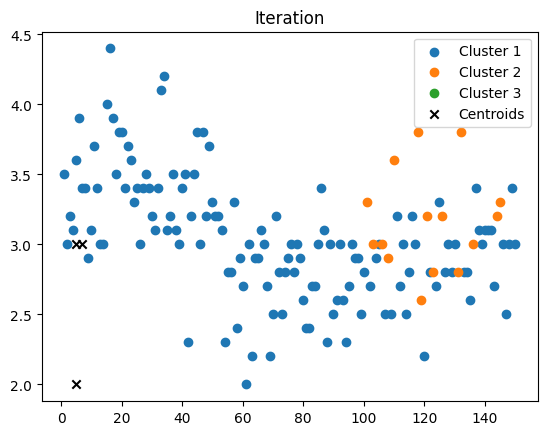

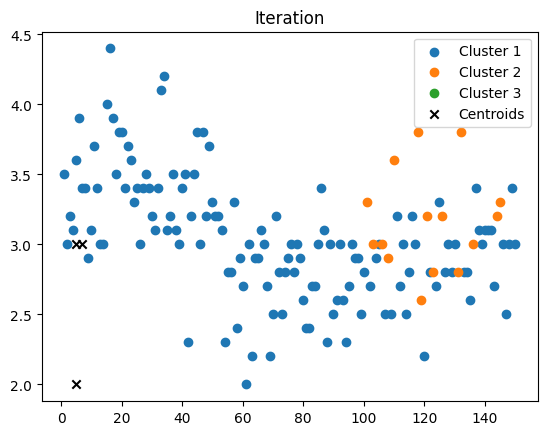

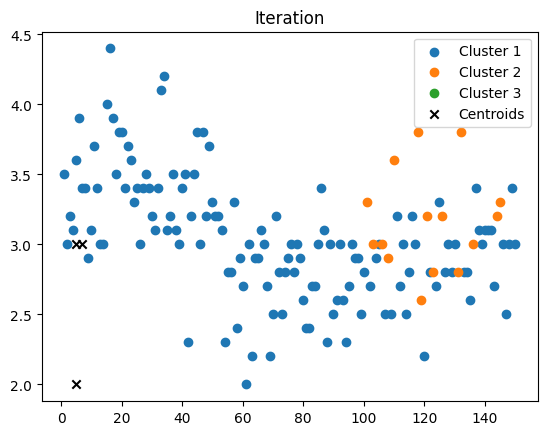

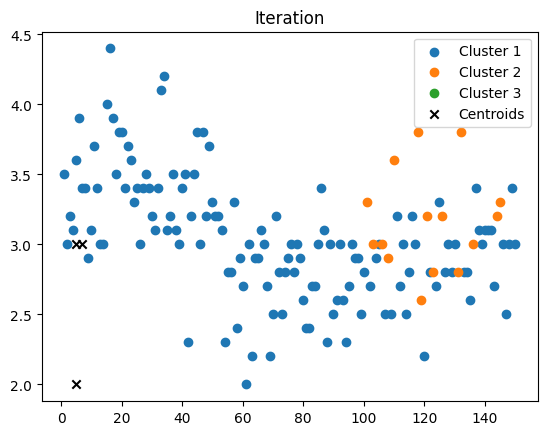

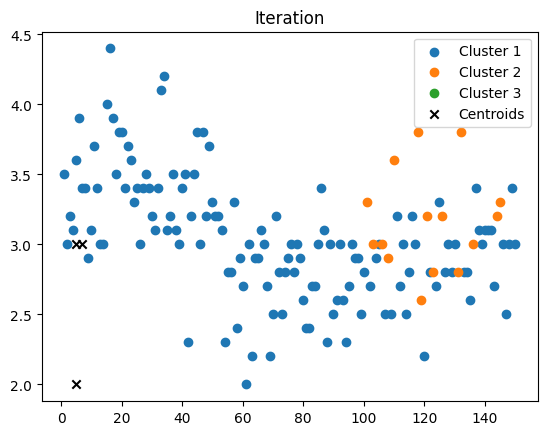

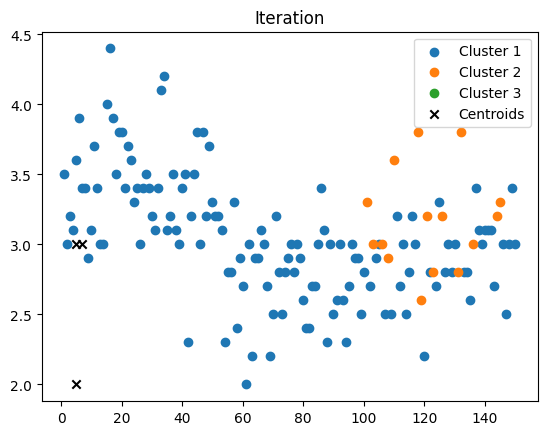

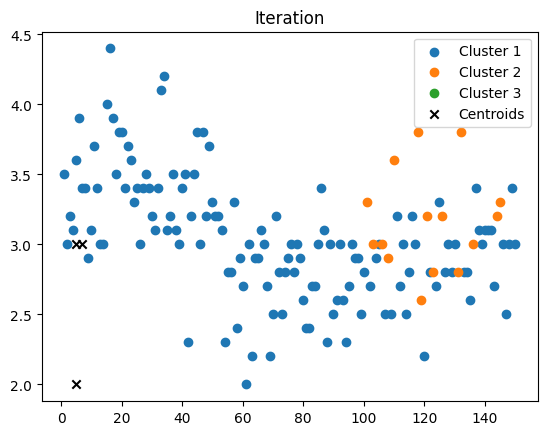

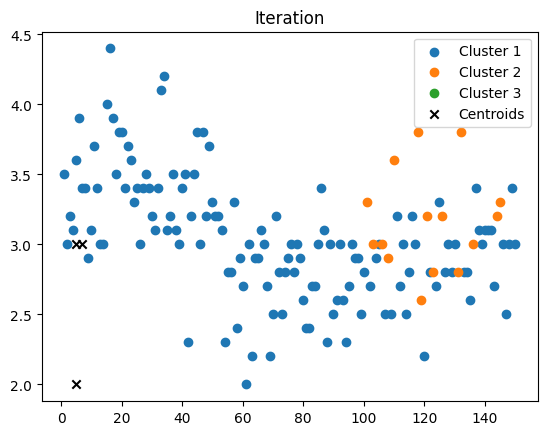

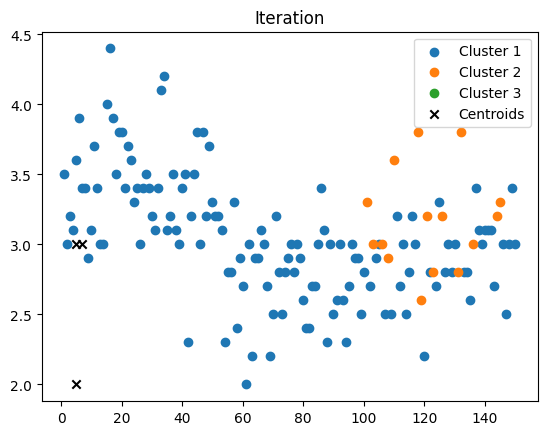

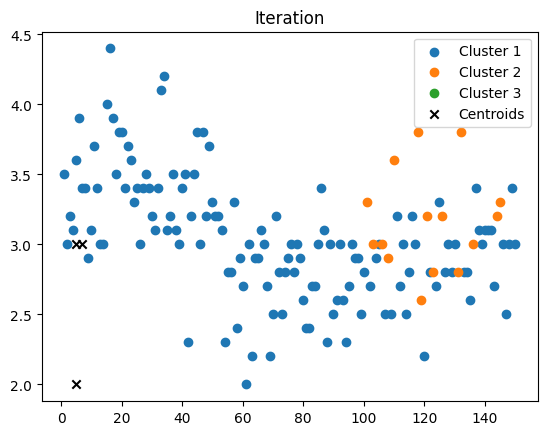

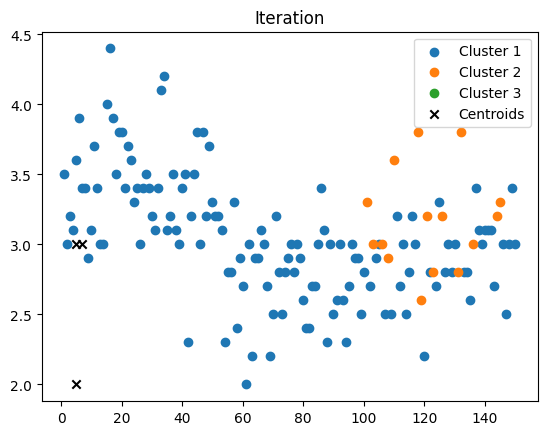

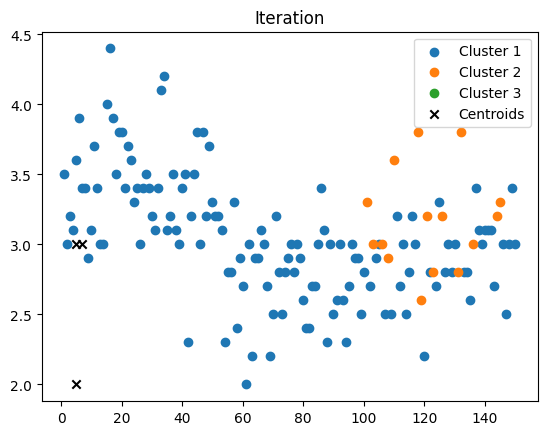

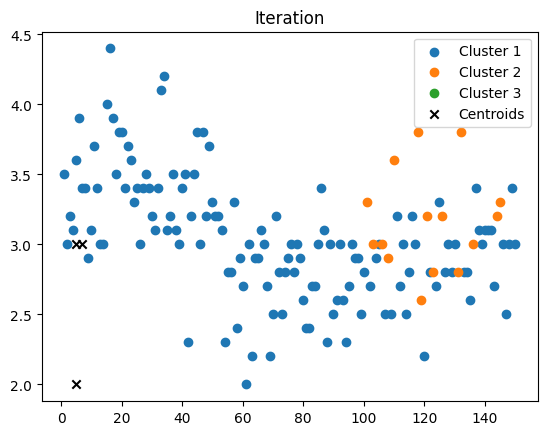

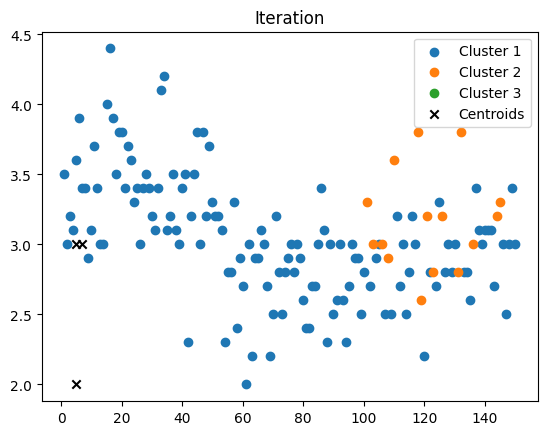

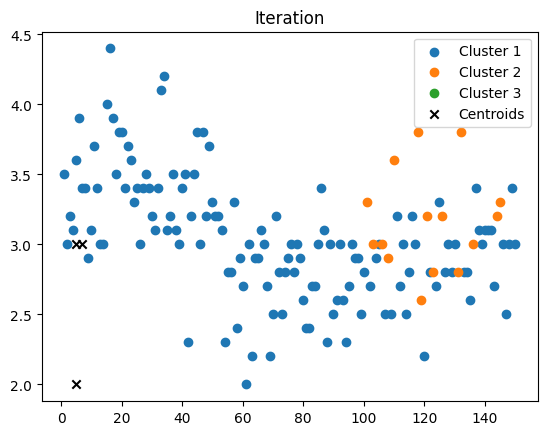

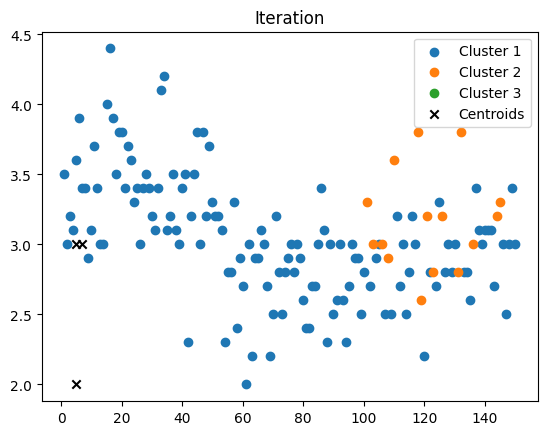

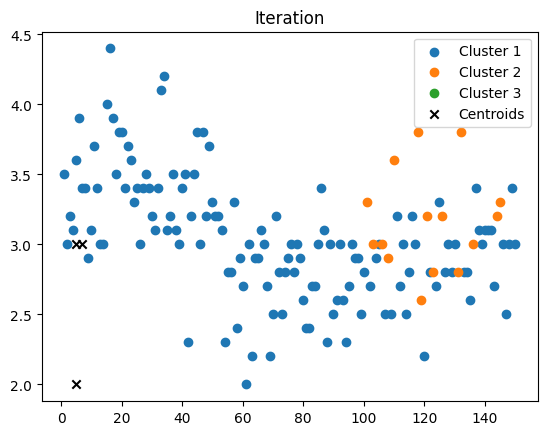

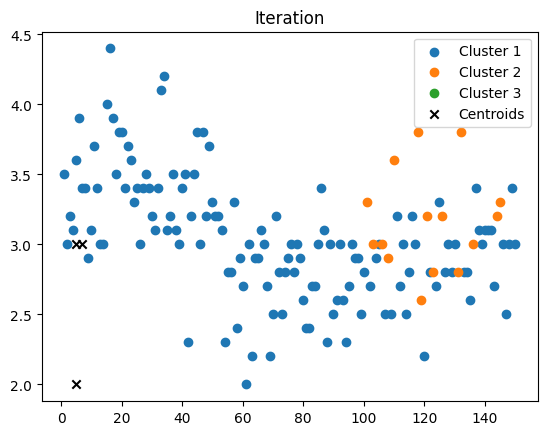

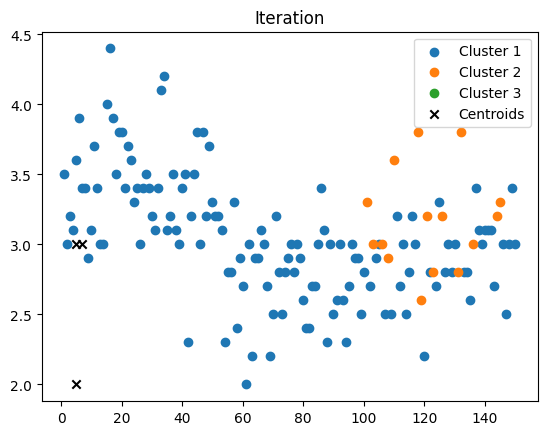

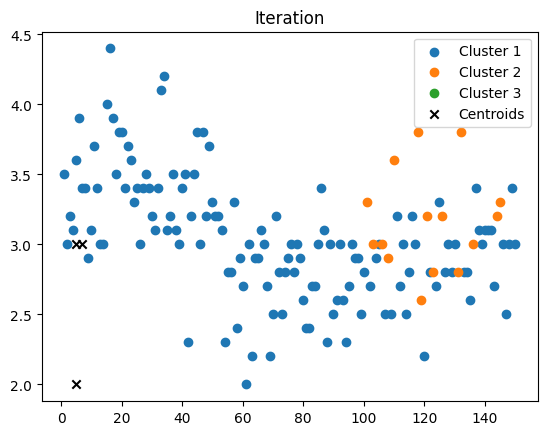

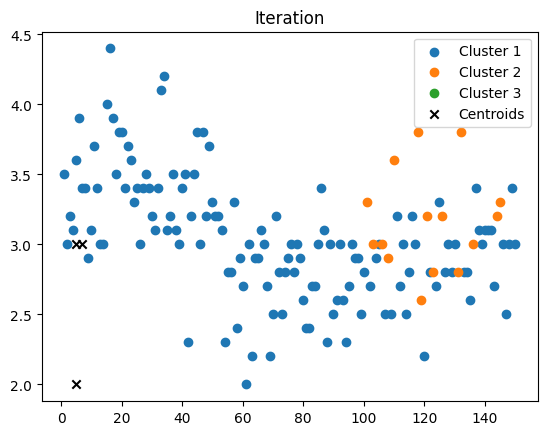

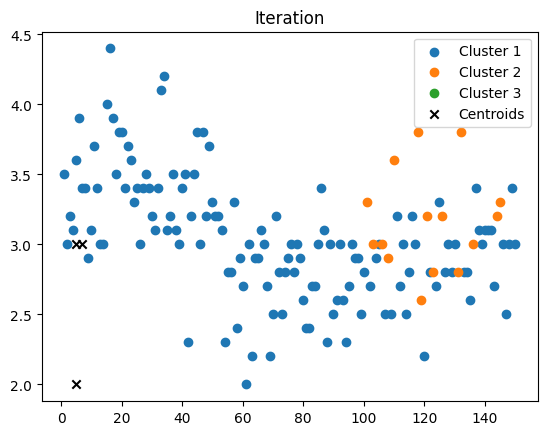

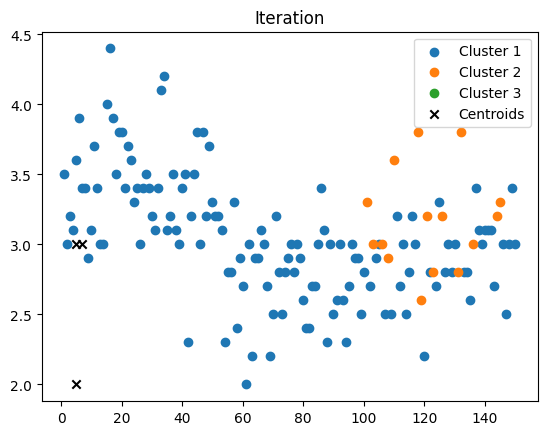

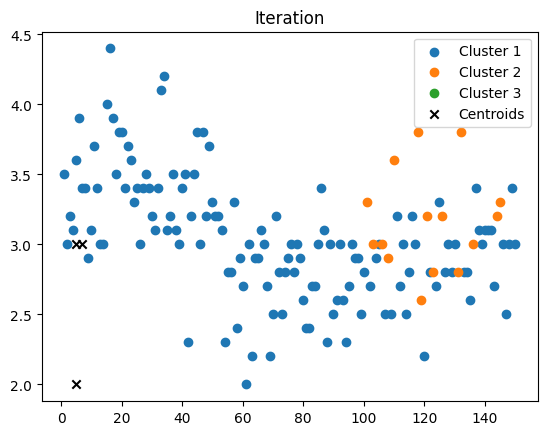

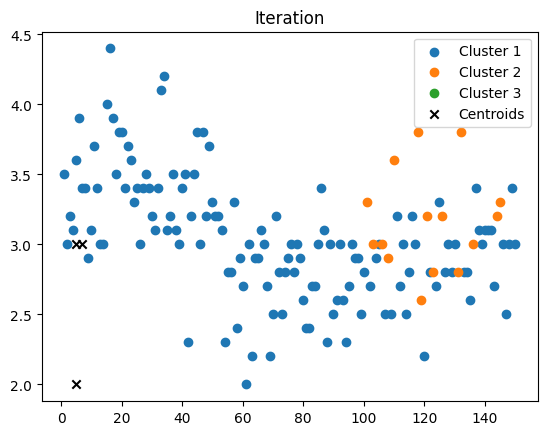

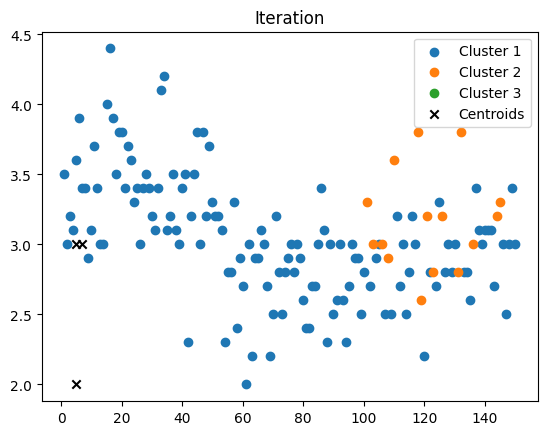

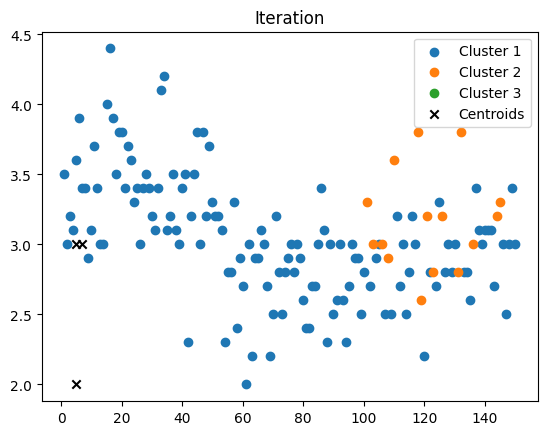

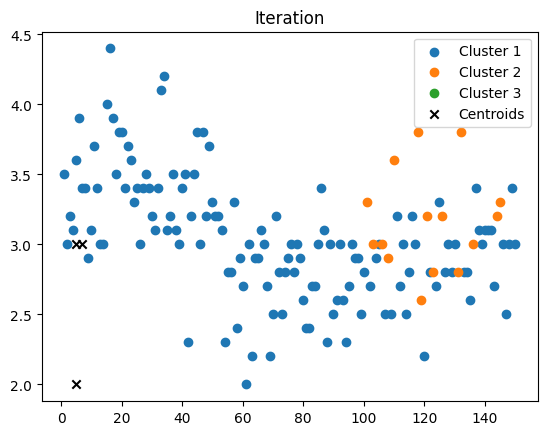

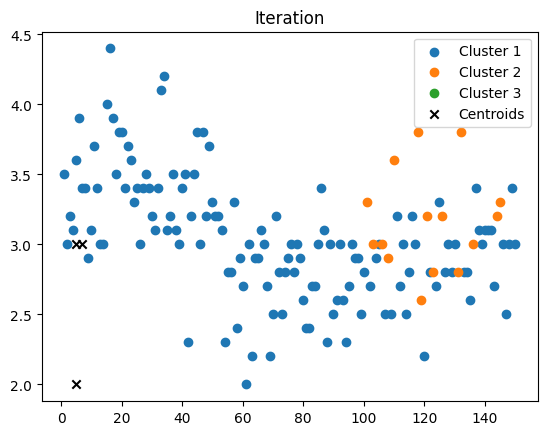

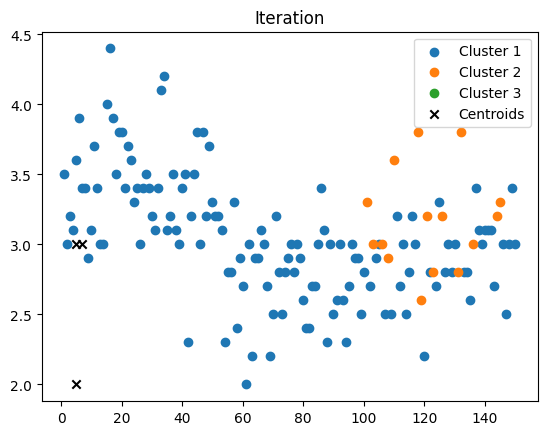

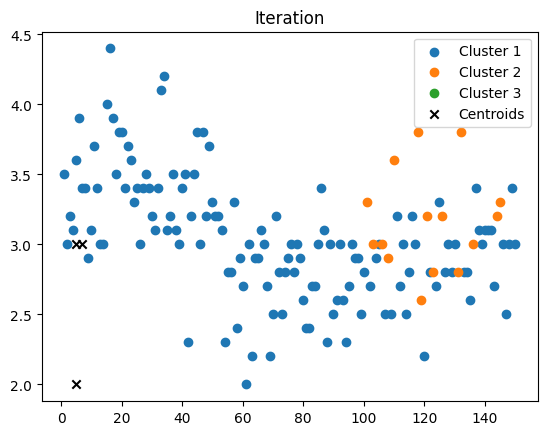

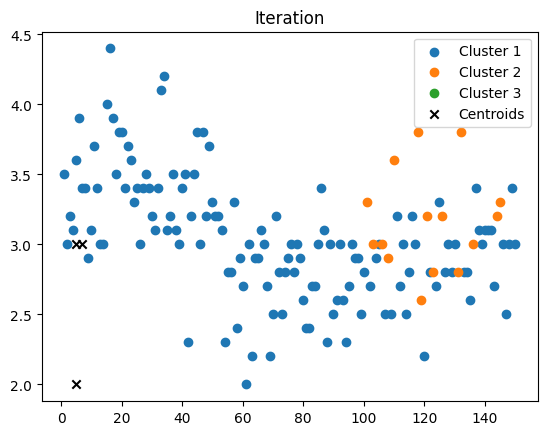

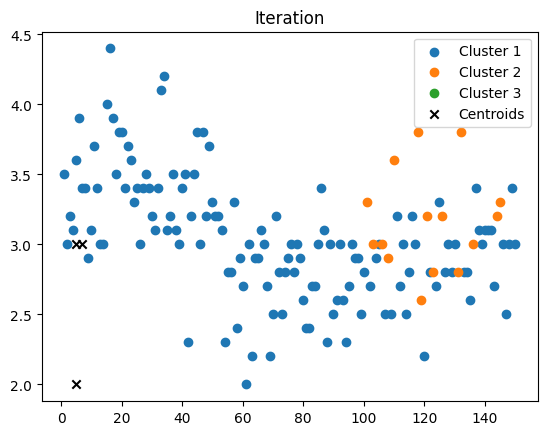

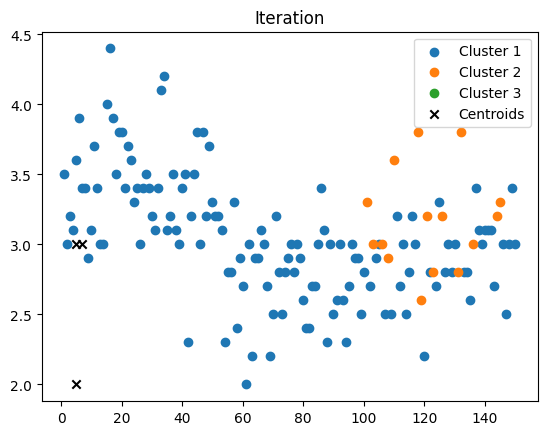

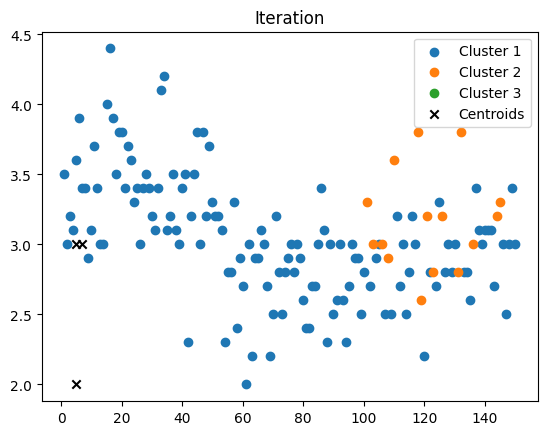

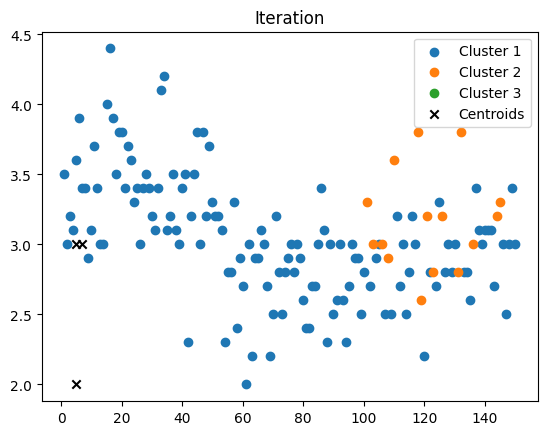

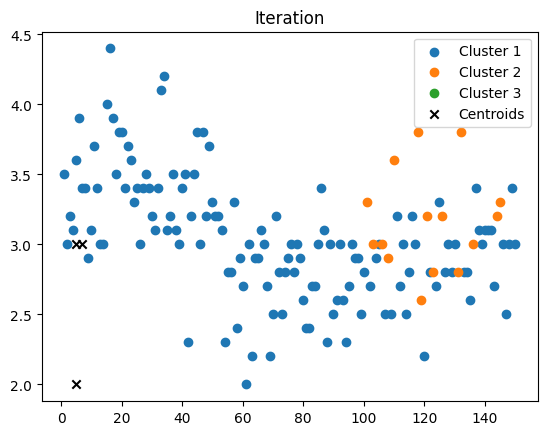

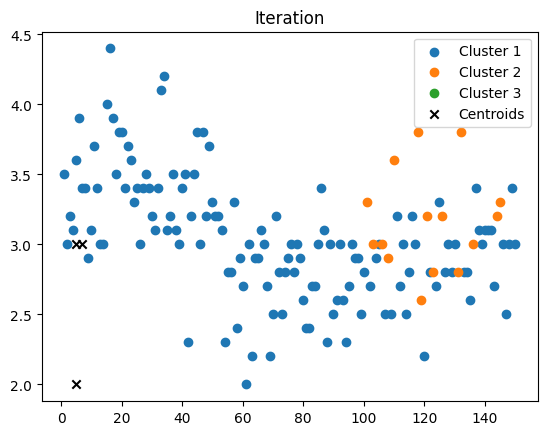

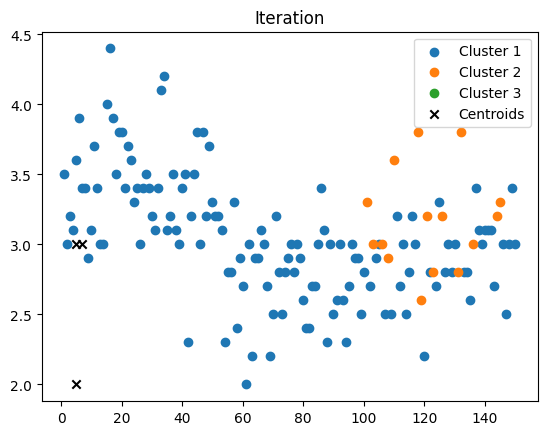

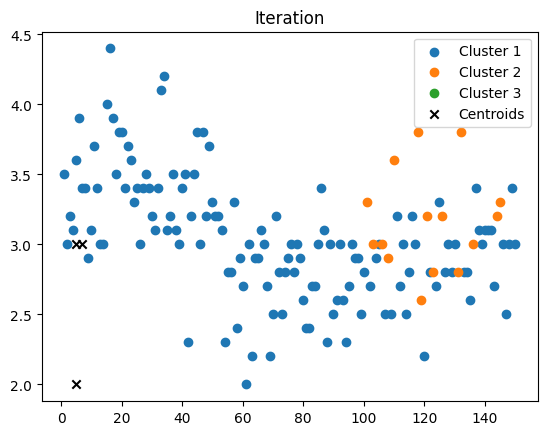

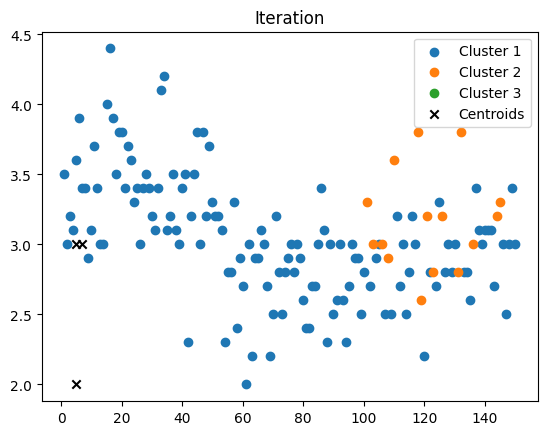

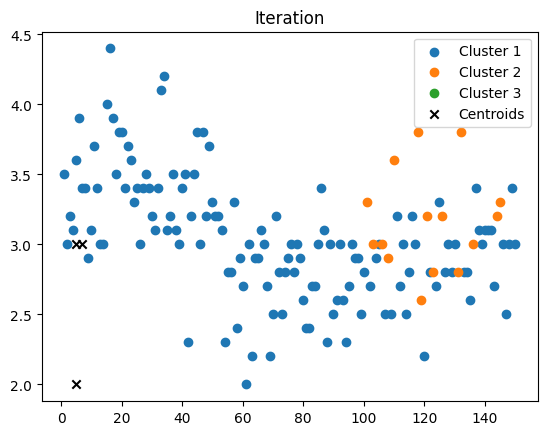

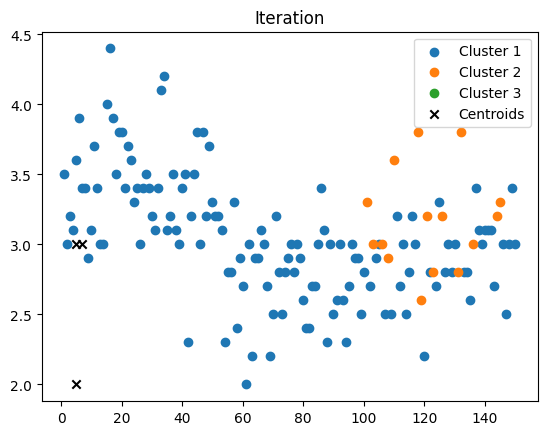

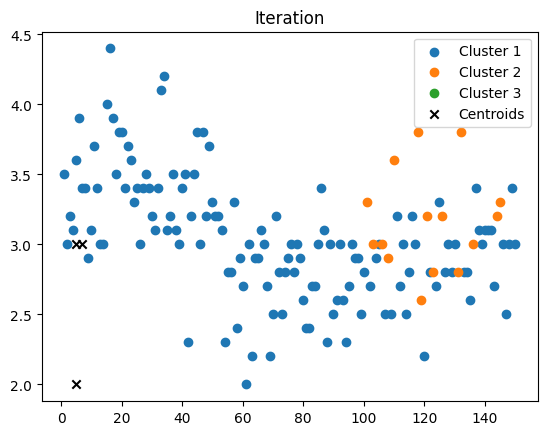

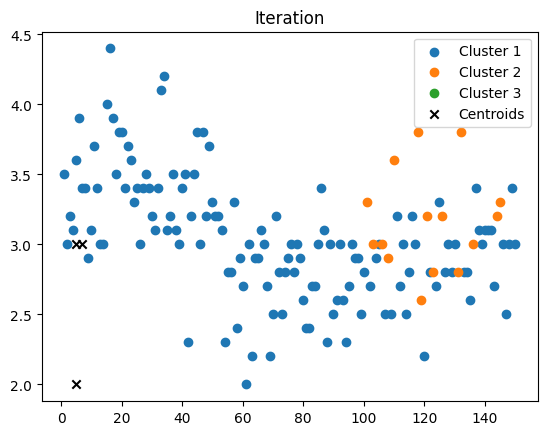

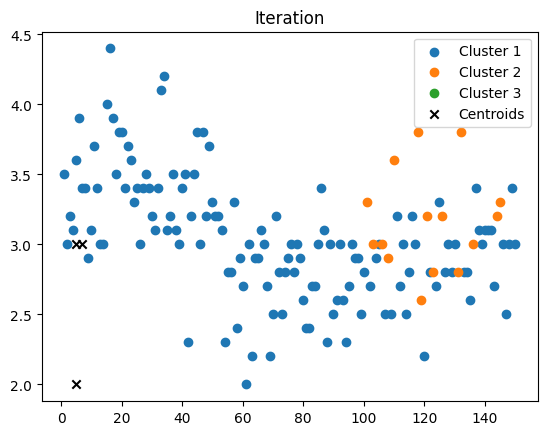

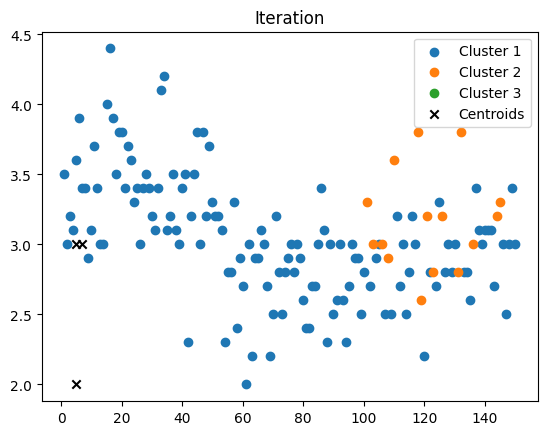

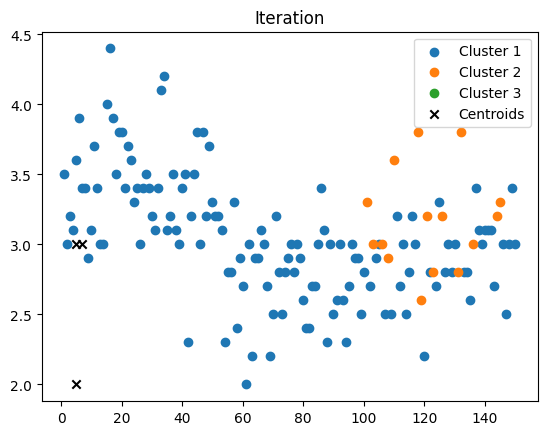

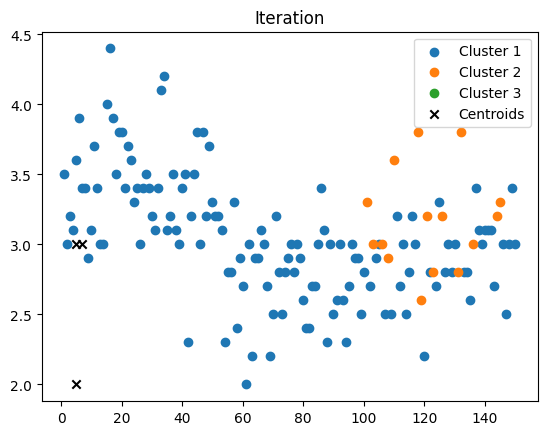

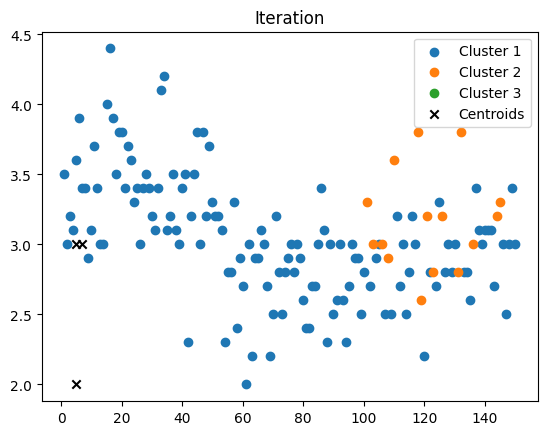

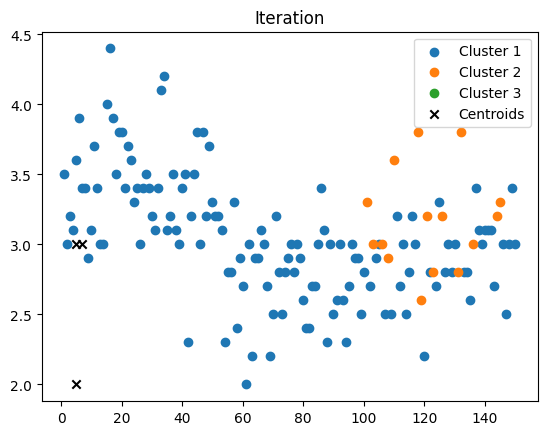

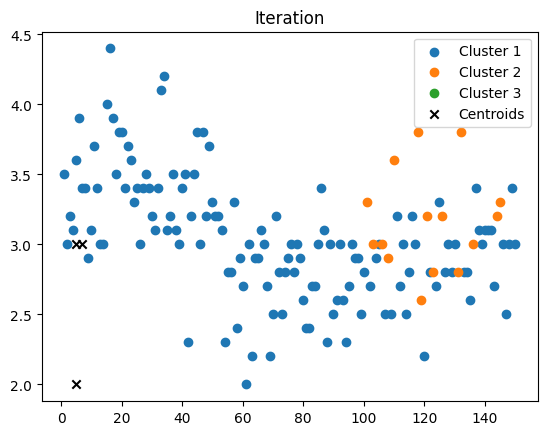

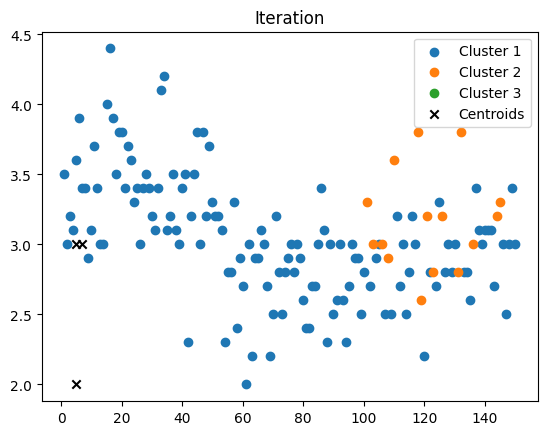

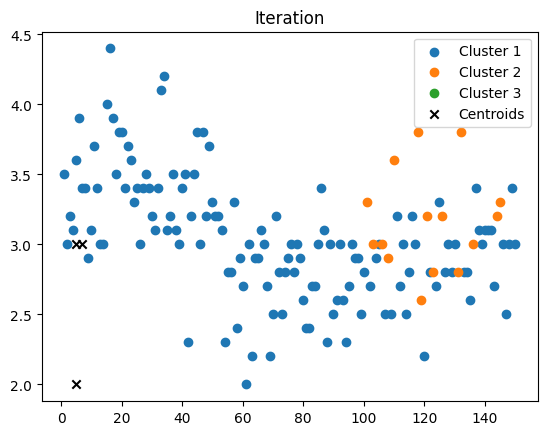

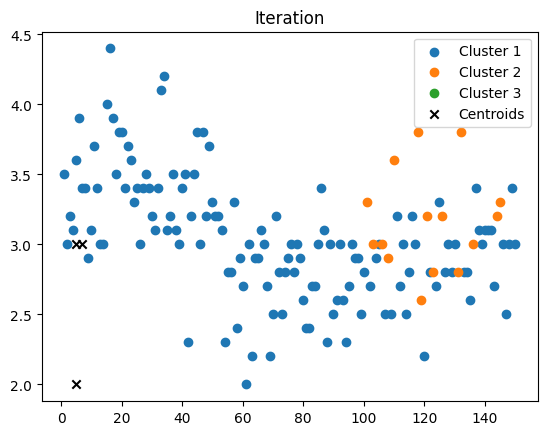

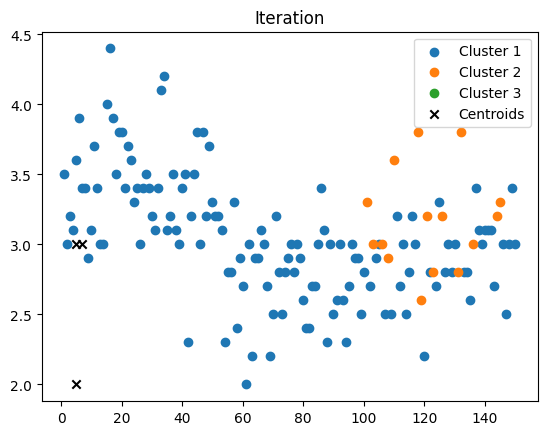

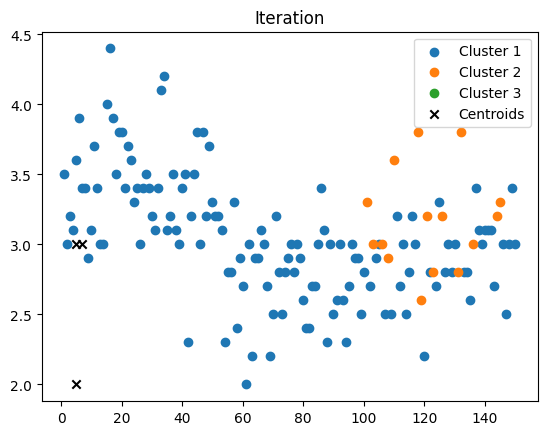

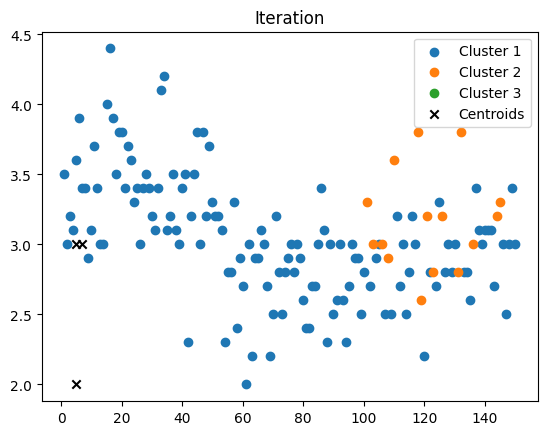

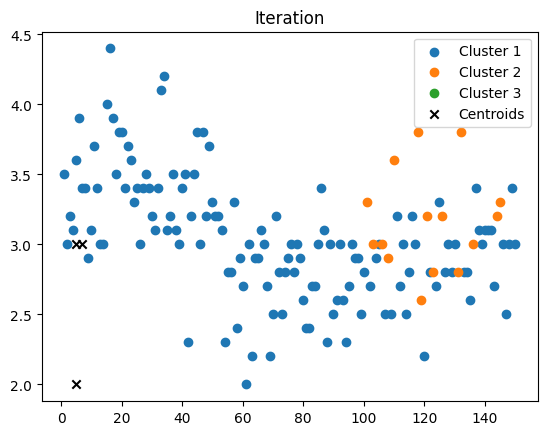

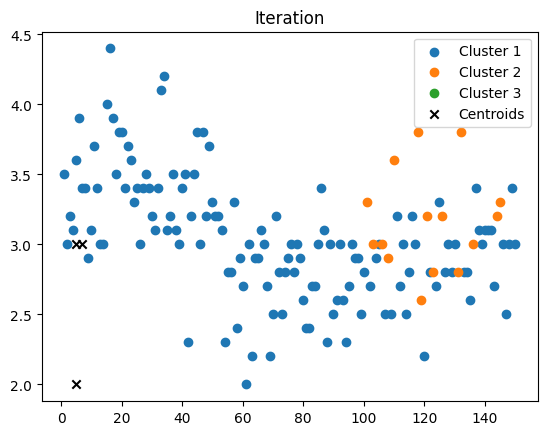

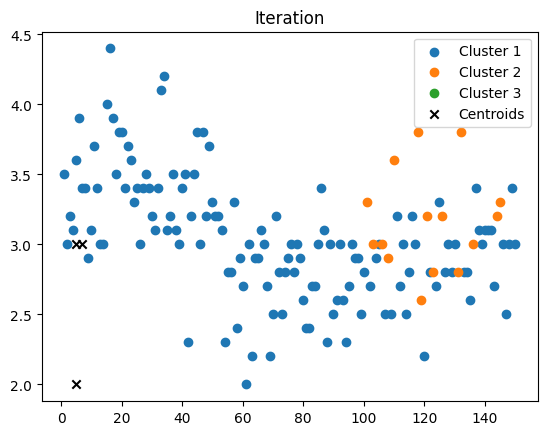

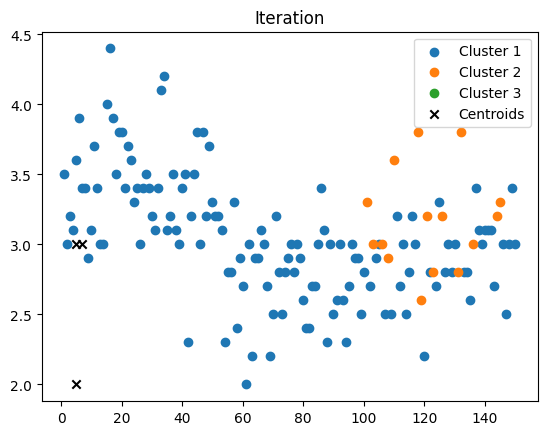

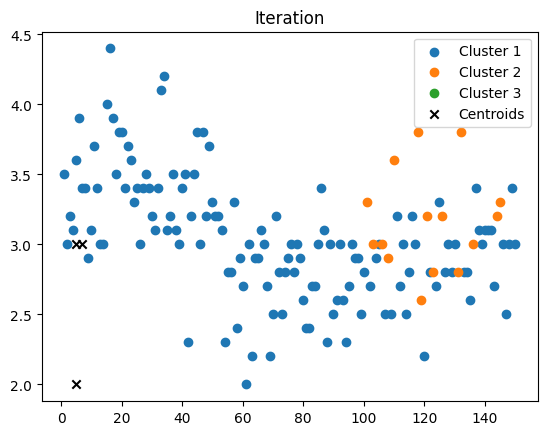

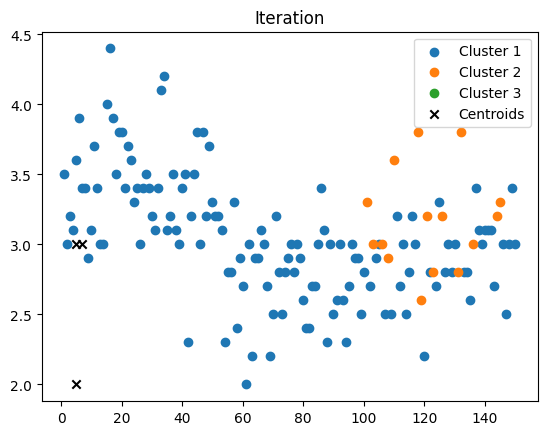

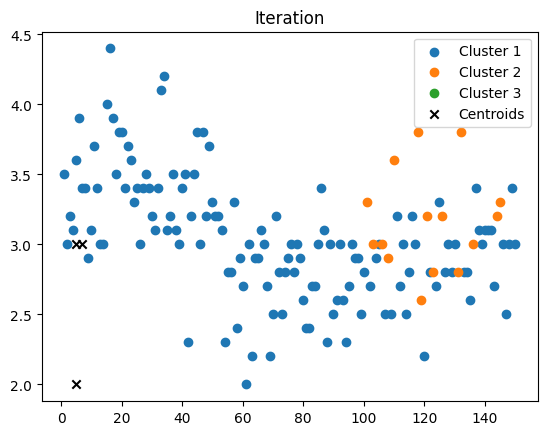

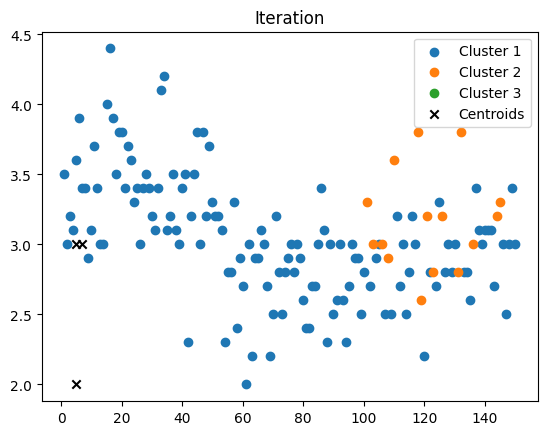

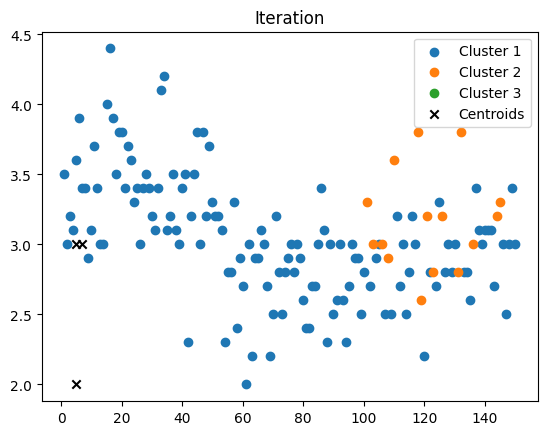

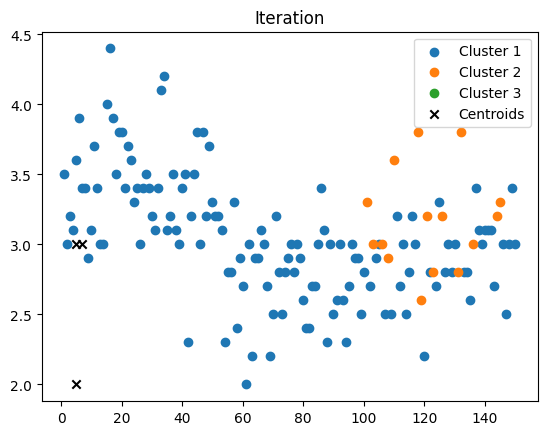

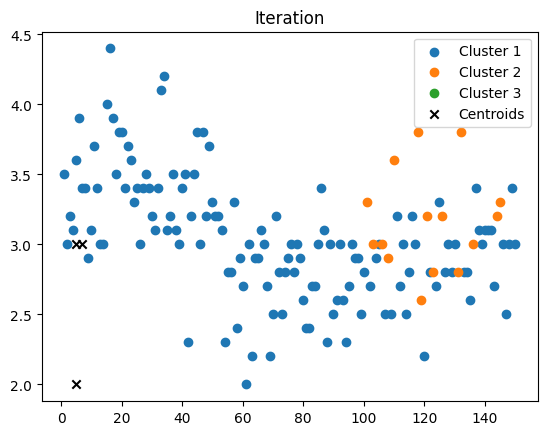

In [14]:
classified, centroid_history = k_clustering(X_data[1:], 3, 100)
# Plotting data points and centroids at each iteration
for centroids in centroid_history:
    for i in range(3):  # Assuming k=3
        plt.scatter(X_data[0][classified == i], X_data[2][classified == i], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', label='Centroids')
    plt.legend()
    plt.title('Iteration')
    plt.show()